# Справочник класса LogisticRegressionModel
## Создание экземпляра класса

In [1]:
import pandas as pd
from vtb_scorekit.data import DataSamples
from vtb_scorekit.model import LogisticRegressionModel

ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output', samples_split={}, bootstrap_split={})

logreg = LogisticRegressionModel(clf=None,            # классификатор модели (должен иметь метод fit() и атрибуты coef_, intercept_). При None выбирается SGDClassifier(alpha=0.001, loss='log', max_iter=100)
                                 ds=ds,               # Привязанный к модели ДатаСэмпл. Если задан, то он по умолчанию будет использоваться во всех методах
                                 transformer=None,    # объект класса WOE для предварительной трансформации факторов
                                 round_digits=3,      # округление коэффициентов до этого кол-ва знаков после запятой   
                                 name='Titanic',      # название модели
                                )   


[INFO] [2023-06-20 14:09:04] ---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------
[INFO] [2023-06-20 14:09:04] Selected 8 features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[INFO] [2023-06-20 14:09:04] Selected 5 categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
[INFO] [2023-06-20 14:09:04] 100 bootstrap samples with 891 observation each and 0.3838 mean target rate were created
[INFO] [2023-06-20 14:09:04] Actual parts of samples after samples split:
      train   Test
part  0.699  0.301
[INFO] [2023-06-20 14:09:04] DataSamples stats:
             train   Test Bootstrap base
amount         623    268            891
target         239    103            342
target_rate  0.384  0.384          0.384
period          NA     NA             NA
[INFO] [2023-06-20 14:09:04] Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', rand

## 1. Автологрег

[INFO] [2023-06-20 14:09:04] ------------------------------------------------------------------------ SFA -------------------------------------------------------------------------
[INFO] [2023-06-20 14:09:04] Performing autobinning with parameters space of size 1...
[INFO] [2023-06-20 14:09:04] Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'pvalue': 0.05, 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': False, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': False, 'G_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10, 'WOEO_on': True, 'WOEO_analytic': True, 'WOEO_all_samples': False, 'verbose': False}
[INFO] [2023-06-20 14:09:04] Processing 8 features on 1 CPU...


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


[INFO] [2023-06-20 14:09:06] Excluded features ['PassengerId', 'Age'] because no suitable binning was found for them
[INFO] [2023-06-20 14:09:06] Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
[INFO] [2023-06-20 14:09:06] All done! 6/8 features successfully binned.
[INFO] [2023-06-20 14:09:06] Transforming features...
[WARNING] [2023-06-20 14:09:06] Can't transform feature PassengerId. Skipped.
[WARNING] [2023-06-20 14:09:06] Can't transform feature Age. Skipped.
[INFO] [2023-06-20 14:09:06] ------------------------------------------------------------------------ MFA -------------------------------------------------------------------------
[INFO] [2023-06-20 14:09:07] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-20 14:09:07] Dropped 0 features with gini lower 10: []
[INFO] [2023-06-20 14:09:07] Dropped 0 features with PSI higher 0.25: []
[INFO] [2023-06-20 14:09:07] -----------------------------

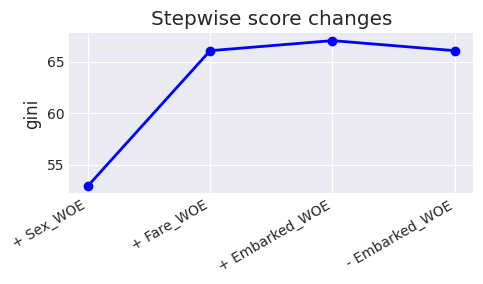

[INFO] [2023-06-20 14:09:08] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-20 14:09:08] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-20 14:09:08] Nothing to drop
[INFO] [2023-06-20 14:09:08] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-20 14:09:08] intercept = -0.206
[INFO] [2023-06-20 14:09:08] coefs = {'Sex_WOE': -0.803, 'Fare_WOE': -0.969}
[INFO] [2023-06-20 14:09:08] Generating report...


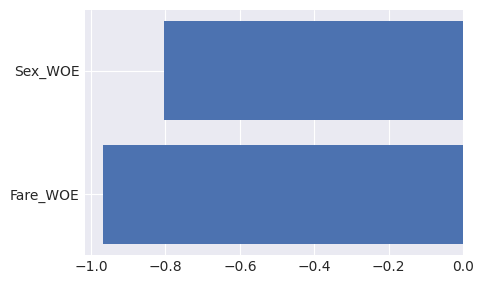

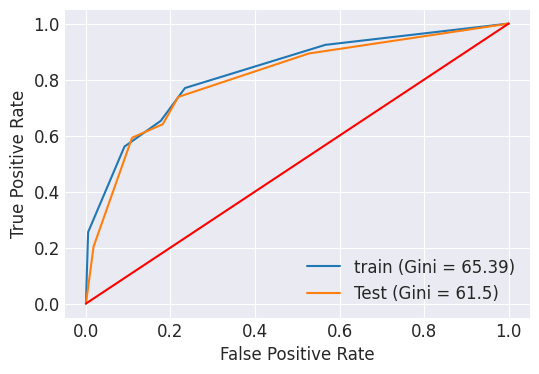

[INFO] [2023-06-20 14:09:09] 
      train  Test  Bootstrap mean  Bootstrap std
Gini  65.39  61.5           64.86           2.62


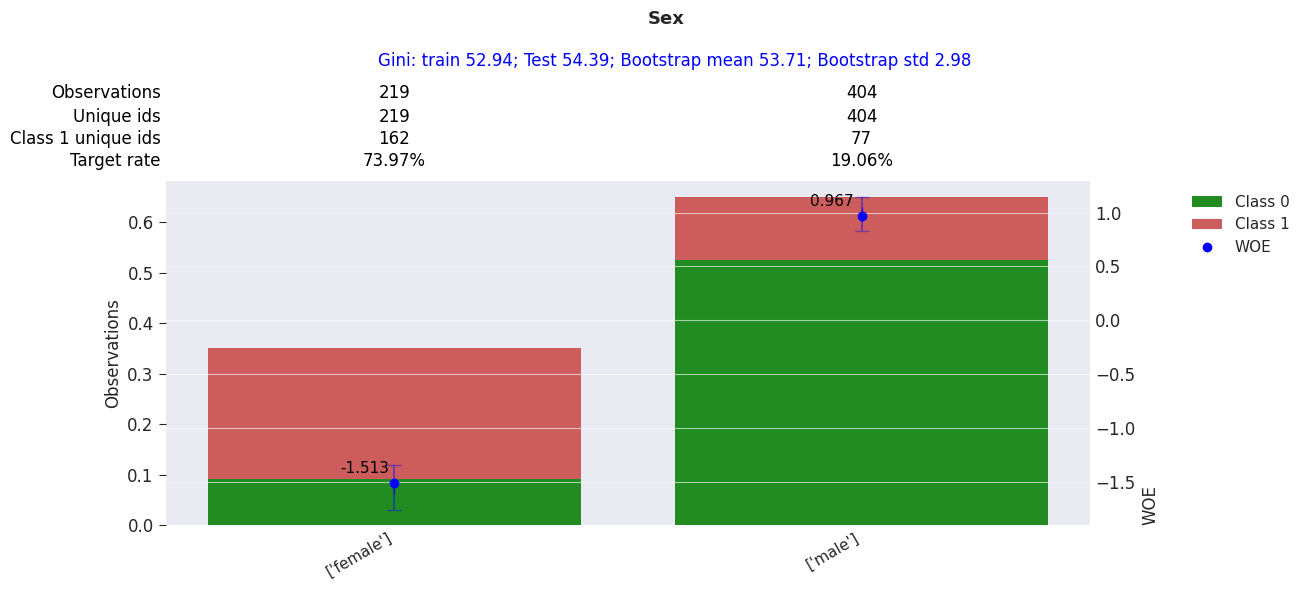

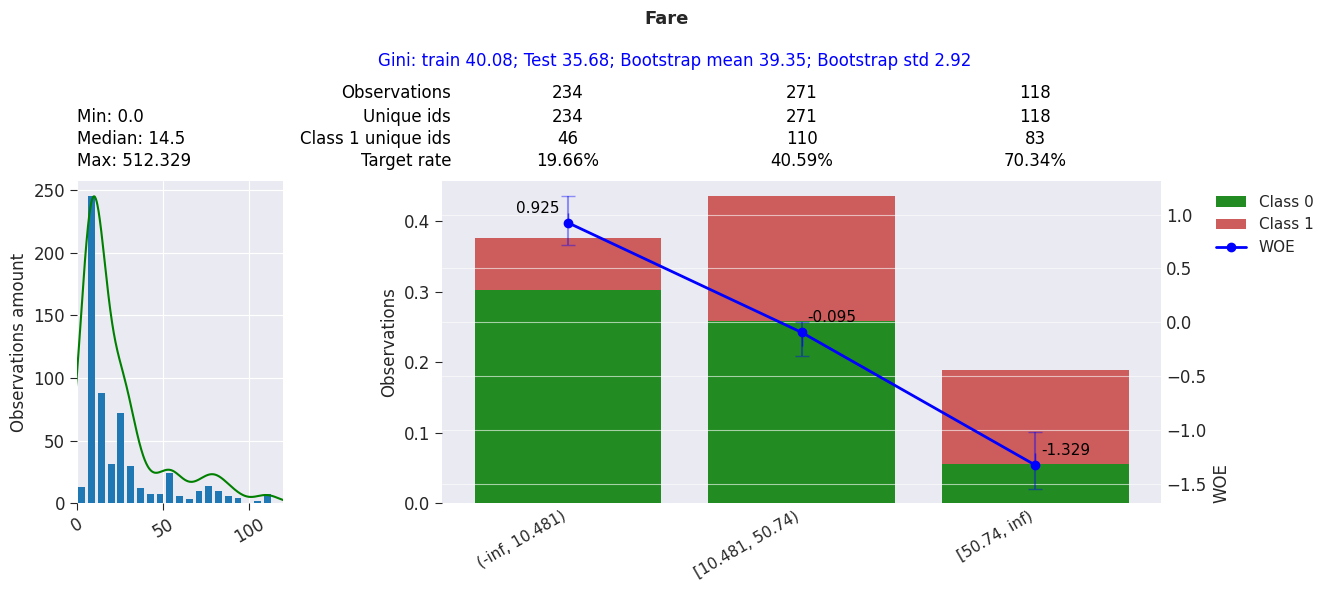

[INFO] [2023-06-20 14:09:12] The model was successfully saved to file titanic_output/auto_model.json


In [2]:
"""
Построение модели в автоматическом режиме с минимальным набором параметров
:param data: ДатаФрейм или ДатаСэмпл.
        - если передается ДатаФрейм, то он разбивается на трейн/тест 70%/30%
        - если передается ДатаСэмпл, то все параметры ниже можно не указывать
:param target: целевая переменная
:param time_column: дата среза
:param id_column: уникальный в рамках среза айди наблюдения
:param feature_descriptions: датафйрем с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
:param n_jobs: кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
:param result_folder: папка, в которую будут сохраняться все результаты работы
:param method: Метод автобиннинга: 'tree' - биннинг деревом, 'opt' - биннинг деревом с последующей оптимизацией границ бинов библиотекой optbinning
:param validate: флаг для выполнения валидацонных тестов
:param out: либо строка с названием эксель файла, либо объект pd.ExcelWriter для сохранения отчета
:param save_model: название json файла для сохранения модели
"""
logreg.auto_logreg(data=None, target=None, time_column=None, id_column=None, feature_descriptions=None, n_jobs=None, 
                   result_folder='', method='opt', validate=False, out='auto_model.xlsx', save_model='auto_model.json') 

## 2. Переменные

In [3]:
# классификатор модели (должен иметь метод fit() и атрибуты coef_, intercept_)
logreg.clf

SGDClassifier(alpha=0.001, loss='log', random_state=0)

In [4]:
# Привязанный ДатаСэмпл. Если задан, то он по умолчанию будет использоваться в остальных методах
logreg.ds

In [5]:
# трансформер (объект класса WOE)
logreg.transformer

In [6]:
#  округление коэффициентов до этого кол-ва знаков после запятой
logreg.round_digits

3

In [7]:
# название модели
logreg.name

'Titanic'

In [8]:
# список перемнных модели
logreg.features

['Sex_WOE', 'Fare_WOE']

In [9]:
# словарь коэффициентов
logreg.coefs

{'Sex_WOE': -0.803, 'Fare_WOE': -0.969}

In [10]:
# константа логрега
logreg.intercept

-0.206

In [11]:
# список коэффициентов для калибровки [a, b] 
# score_calibr = a + b*score
logreg.calibration

In [12]:
# словарь шкалы {грейд: верхняя граница PD грейда} 
'''
пример мастер-шкалы:
{
'MA1': 0.00050,
'MA2': 0.00069,
'MA3': 0.00097,
'MB1': 0.0013,
'MB2': 0.0019,
'MB3': 0.0027,
'MC1': 0.0038,
'MC2': 0.0053,
'MC3': 0.0075,
'MD1': 0.010,
'MD2': 0.014,
'MD3': 0.020,
'ME1': 0.029,
'ME2': 0.041,
'ME3': 0.057,
'MF1': 0.081,
'MF2': 0.11,
'MF3': 0.16,
'MG1': 0.22,
'MG2': 0.31,
'MG3': 1
}
'''
logreg.scale

## 3. Методы

In [13]:
"""
Сохранение факторов, коэффициентов, калибровки, шкалы и биннинга в файл
:param file_name: название json файла для сохранения модели. При None json возвращается методом
:param pickle_protocol: версия протокола для сериализации объектов. Версия 5 доступна только для питона 3.8+
"""
logreg.save_model(file_name='auto_model.json', pickle_protocol=4)    

[INFO] [2023-06-20 14:09:13] The model was successfully saved to file titanic_output/auto_model.json


In [14]:
"""
Загрузка факторов, коэффициентов, калибровки, шкалы и биннинга из файла
:param file_name: название json файла или словарь для загрузки модели
"""
logreg.load_model(file_name='titanic_output/auto_model.json')

[INFO] [2023-06-20 14:09:13] The model was loaded from file titanic_output/auto_model.json
[INFO] [2023-06-20 14:09:13] clf = SGDClassifier(alpha=0.001, loss='log', random_state=0)
[INFO] [2023-06-20 14:09:13] name = Titanic
[INFO] [2023-06-20 14:09:13] coefs = {'Sex_WOE': -0.803, 'Fare_WOE': -0.969}
[INFO] [2023-06-20 14:09:13] intercept = -0.206
[INFO] [2023-06-20 14:09:13] calibration = None
[INFO] [2023-06-20 14:09:13] scale = None
[INFO] [2023-06-20 14:09:13] round_digits = 3


[INFO] [2023-06-20 14:09:13] ------------------------------------------------------------------------ MFA -------------------------------------------------------------------------
[INFO] [2023-06-20 14:09:13] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-20 14:09:13] Dropped 0 features with gini lower 5: []
[INFO] [2023-06-20 14:09:13] Dropped 0 features with PSI higher 0.25: []
[INFO] [2023-06-20 14:09:13] ---------------------------------------------- Step 2 ----------------------------------------------
[INFO] [2023-06-20 14:09:13] Dropped 0 correlated features: []
[INFO] [2023-06-20 14:09:13] ---------------------------------------------- Step 3 ----------------------------------------------
[INFO] [2023-06-20 14:09:13] Stepwise feature selection started...
[INFO] [2023-06-20 14:09:13] To add: Sex_WOE, gini: 52.935, p-value: 1.8592376132023526e-25
[INFO] [2023-06-20 14:09:13] To add: Fare_WOE, gini: 66.058, p-va

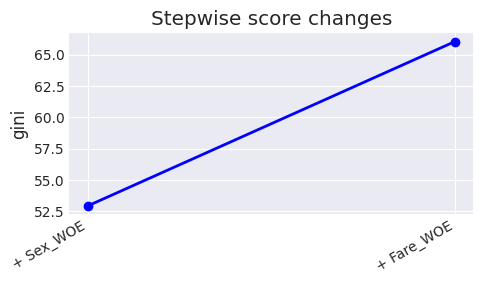

[INFO] [2023-06-20 14:09:14] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-20 14:09:14] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-20 14:09:14] Nothing to drop
[INFO] [2023-06-20 14:09:14] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-20 14:09:14] intercept = -0.206
[INFO] [2023-06-20 14:09:14] coefs = {'Sex_WOE': -0.803, 'Fare_WOE': -0.969}
[INFO] [2023-06-20 14:09:14] Generating report...


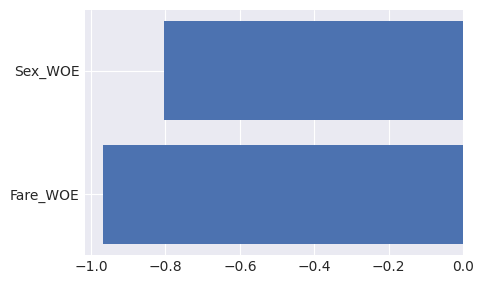

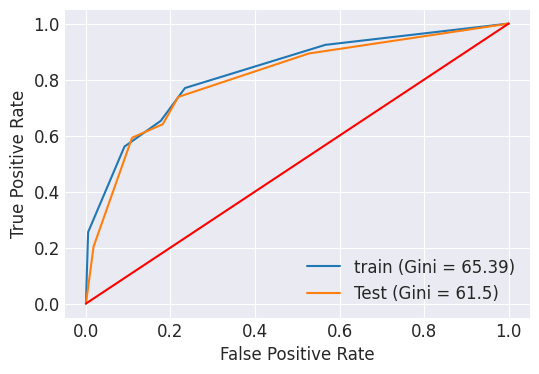

[INFO] [2023-06-20 14:09:14] 
      train  Test  Bootstrap mean  Bootstrap std
Gini  65.39  61.5           64.86           2.62


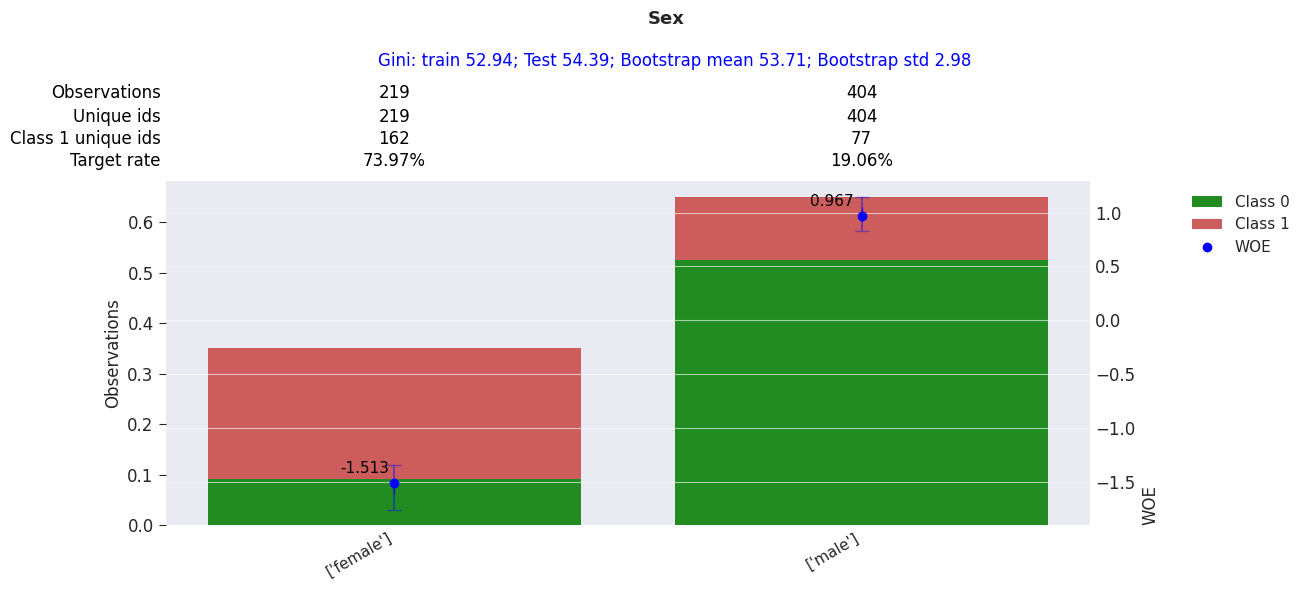

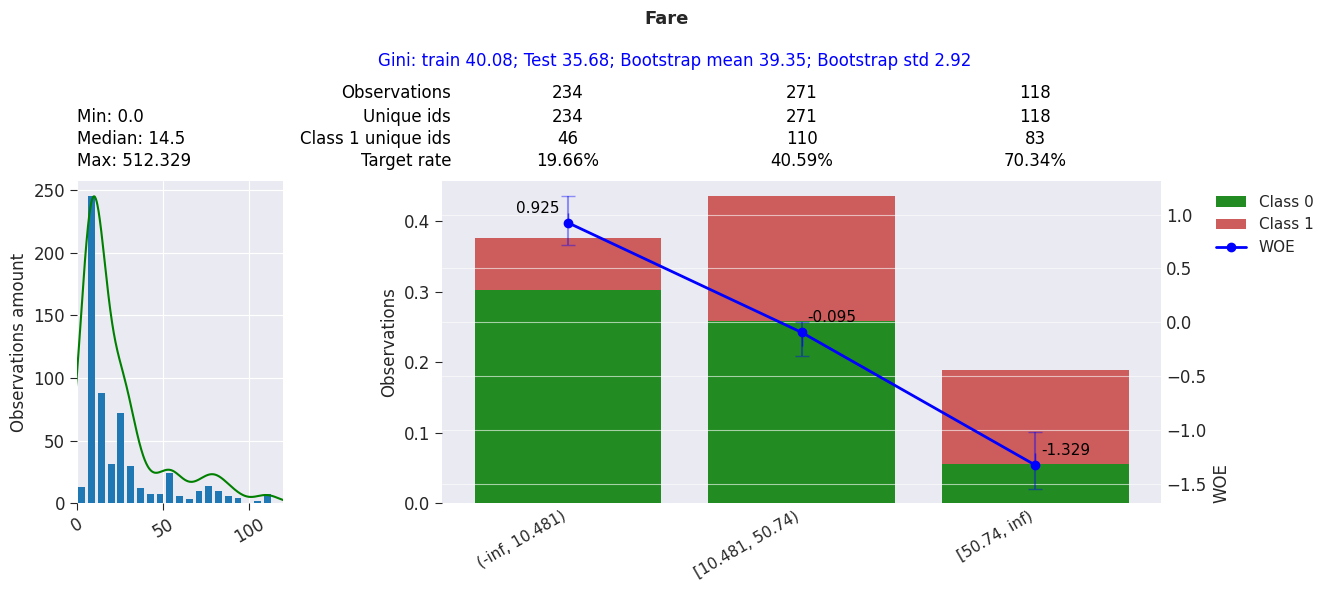

In [15]:
"""
Многофакторный отбор. Проходит в 4 основных этапа:

1) Отбор по джини и PSI. Исключаются все факторы с джини ниже gini_threshold и PSI выше psi_threshold.
    При заданном time_column PSI считается между временными срезами, иначе - между сэмплами

2) Корреляционный анализ. Доступны два варианта работы:
    drop_with_most_correlations=False - итерационно исключается фактор с наименьшим джини из списка коррелирующих факторов
    drop_with_most_correlations=True - итерационно исключается фактор с наибольшим кол-вом коррелирующих с ним факторов

3) Итерационный отобор. Доступны три типа отбора:
    selection_type='forward' - все доступные факторы помещаются в список кандидатов, на каждом шаге из списка кандидатов определяется лучший* фактор и добавляется в модель
    selection_type='backward' - в модель включаются все доступные факторы, затем на каждом шаге исключается худший* фактор
    selection_type='stepwise' - комбинация 'forward' и 'backward'. Каждый шаг состоит из двух этапов:
            на первом из списка кандидатов отбирается лучший* фактор в модель,
            на втором из уже включенных факторов выбирается худший* и исключается

    *Определение лучшего фактора:
    При pvalue_priority=False лучшим фактором считается тот, который увеличивает метрику scoring модели на наибольшую величину.
        Если величина такого увеличения ниже score_delta, то счетчик n_stops уменьшается на 1. Когда он достигнет нуля, отбор прекращается
    При pvalue_priority=True лучшим фактором считается фактор, который после добавления в модель имеет наименьшее p-value.
        Если величина этого p-value выше pvalue_threshold, то счетчик n_stops уменьшается на 1. Когда он достигнет нуля, отбор прекращается

    *Определение худшего фактора:
    Худшим фактором в модели считается фактор с наибольшим p-value.
        Если величина этого p-value ниже pvalue_threshold, то худший фактора не определяется, и исключения не происходит

4) Если выставлен флаг drop_positive_coefs=True, то из списка отобранных на этапе 3 факторов итерационно
    исключаются факторы с положительными коэффициентами и факторы с p_value > pvalue_threshold
:param ds: ДатаСэмпл. В случае, если он не содержит трансформированные переменные, то выполняется трансформация трансформером self.transformer.
           При None берется self.ds
:param features: исходный список переменных для МФА. При None берутся все переменные, по которым есть активный биннинг
:param hold: список переменных, которые обязательно должны войти в модель
:param features_ini: список переменных, с которых стартует процедура отбора. Они могут быть исключены в процессе отбора
:param limit_to_add: максимальное кол-во переменных, которые могут быть добавлены к модели. Применимо только к типам forward и stepwise
:param gini_threshold: граница по джини для этапа 1
:param corr_method: метод расчета корреляций для этапа 2. Доступны варианты 'pearson', 'kendall', 'spearman'
:param corr_threshold: граница по коэффициенту корреляции для этапа 2
:param drop_with_most_correlations: вариант исключения факторов в корреляционном анализе для этапа 2
:param drop_corr_iteratively: исключение коррелирующих факторов не на отдельном этапе 2, а итеративно в процессе этапа 3
                             (список кандидатов на добавление в модель формируется динамически после каждого шага,
                              из него исключаются все коррелирующие с уже включенными факторы).
                             Применимо только для типов отбора forward и stepwise
:param selection_type: тип отбора для этапа 3
:param pvalue_threshold: граница по p-value для этапа 3
:param pvalue_priority: вариант определения лучшего фактора для этапа 3
:param scoring: максимизируемая метрика для этапа 3.
        Варианты значений: 'gini', 'AIC', 'BIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param score_delta: минимальный прирост метрики для этапа 3
:param n_stops: количество срабатываний нарушений правил отбора по приросту метрики/p-value до завершения этапа 3
:param cv: параметр cv для вызова sklearn.model_selection.cross_val_score. При None берется StratifiedKFold(5, shuffle=True)
:param drop_positive_coefs: флаг для выполнения этапа 4

--- Кросс переменные ---
:param crosses_simple: True  - после трансформации кросс-переменные учавствут в отборе наравне со всеми переменными
                       False - сначала выполняется отбор только на основных переменных,
                               затем в модель добавляются по тем же правилам кросс переменные, но не более, чем crosses_max_num штук
:param crosses_max_num: максимальное кол-во кросс переменных в модели. учитывается только при crosses_simple=False

--- Отчет ---
:param verbose: флаг для вывода подробных комментариев в процессе работы
:param result_file: название файла отчета. При None результаты не сохраняются
:param metrics: список метрик/тестов, результы расчета которых должны быть включены в отчет.
                  Элементы списка могут иметь значения (не чувствительно к регистру):
                              'ontime'  : расчет динамики джини по срезам,
                              'vif'     : расчет Variance Inflation Factor,
                              'psi'     : расчет Population Population Stability Index,
                              'wald'    : тест Вальда,
                              'ks'      : тест Колмогорова-Смирнова,
                              'anderson': Anderson-Darling test,
                              'chi2'    : Chisquare test,
                              'cramer'  : Cramer-Von-mises test,
                              'en_dist' : Energy distance,
                              'epps'    : Epps-Singleton test,
                              'h_dist'  : Hellinger distance,
                              'jh'      : Jensen-Shannon distance,
                              'kl'      : Kullback-Leibler divergence,
                              'mann'    : Mann-Whitney U-rank test,
                              'mmd'     : Squared euclidean pairwise distance,
                              't'       : T -test,
                              'tvd'     : Total variation distance,
                              'w_dist'  : Wasserstein distance ,
                              'z'       : Z-test,
                              func      : пользовательская функция, которая принимает целевую и зависимую переменную,
                                          и возвращает числовое значение метрики

                                Например,
                                def custom_metric(y_true, y_pred):
                                    from sklearn.metrics import roc_curve, f1_score
                                    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
                                    thres = thresholds[np.argmax(tpr * (1 - fpr))]
                                    return f1_score(y_true, (y_pred > thres).astype(int))
                                metrics = ['vif', 'ks', 'psi', custom_metric]
:param metrics_cv: список метрик, рассчитываемых через sklearn.model_selection.cross_val_score.
                  Аналогично параметру metrics элементами могут быть строки, поддерживаемые cross_val_score, либо пользовательские функции
                  Например, ['roc_auc', 'neg_log_loss', 'gini', 'f1', 'accuracy', custom_metric]
"""
logreg.mfa(ds=None, features=None, hold=None, features_ini=None, limit_to_add=100, gini_threshold=5, psi_threshold=0.25,
           corr_method='pearson', corr_threshold=0.75, drop_with_most_correlations=False, drop_corr_iteratively=False,
           selection_type='stepwise', pvalue_threshold=0.05, pvalue_priority=False, scoring='gini', score_delta=0.1,
           n_stops=1, cv=None, drop_positive_coefs=True, crosses_simple=True, crosses_max_num=10,
           verbose=True, result_file='mfa.xlsx', metrics=None, metrics_cv=None)

In [16]:
"""
Генерация отчета по обученной модели.
:param ds: ДатаСэмпл. В случае, если он не содержит трансформированные переменные, то выполняется трансформация трансформером self.transformer
:param out: либо строка с названием эксель файла, либо объект pd.ExcelWriter для сохранения отчета
:param sheet_name: название листа в экселе
:param pvalue_threshold: граница по p-value. Используется только для выделения значений p-value цветом
:param verbose: флаг вывода комментариев в процессе работы
:param add_figs: список из графиков, которые должны быть добавлены в отчет
:param gini_df: датафрейм с джини всех переменных модели
:param metrics: список метрик/тестов, результы расчета которых должны быть включены в отчет.
                  Элементы списка могут иметь значения (не чувствительно к регистру):
                      'ontime'  : расчет динамики джини по срезам,
                      'vif'     : расчет Variance Inflation Factor,
                      'psi'     : расчет Population Population Stability Index,
                      'wald'    : тест Вальда,
                      'ks'      : тест Колмогорова-Смирнова,
                      'anderson': Anderson-Darling test,
                      'chi2'    : Chisquare test,
                      'cramer'  : Cramer-Von-mises test,
                      'en_dist' : Energy distance,
                      'epps'    : Epps-Singleton test,
                      'h_dist'  : Hellinger distance,
                      'jh'      : Jensen-Shannon distance,
                      'kl'      : Kullback-Leibler divergence,
                      'mann'    : Mann-Whitney U-rank test,
                      'mmd'     : Squared euclidean pairwise distance,
                      't'       : T -test,
                      'tvd'     : Total variation distance,
                      'w_dist'  : Wasserstein distance ,
                      'z'       : Z-test,
                      func      : пользовательская функция, которая принимает целевую и зависимую переменную,
                                  и возвращает числовое значение метрики

                                Например,
                                def custom_metric(y_true, y_pred):
                                    from sklearn.metrics import roc_curve, f1_score
                                    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
                                    thres = thresholds[np.argmax(tpr * (1 - fpr))]
                                    return f1_score(y_true, (y_pred > thres).astype(int))
                                metrics = ['vif', 'ks', 'psi', custom_metric]
:param metrics_cv: список метрик, рассчитываемых через sklearn.model_selection.cross_val_score.
                  Аналогично параметру metrics элементами могут быть строки, поддерживаемые cross_val_score, либо пользовательские функции
                  Например, ['roc_auc', 'neg_log_loss', 'gini', 'f1', 'accuracy', custom_metric]
:param cv: параметр cv для вызова sklearn.model_selection.cross_val_score

:return: ДатаФрейм со сводной таблицей отчета
"""
logreg.report(ds=None, out='report.xlsx', sheet_name=None, pvalue_threshold=0.05, verbose=False, add_figs=None, gini_df=None, metrics=None, metrics_cv=None, cv=None)        

Gini                                     coefficient     se  \
           train   Test Bootstrap mean Bootstrap std                      
feature                                                                   
Sex_WOE    52.94  54.39          53.71          2.98      -0.803  0.082   
Fare_WOE   40.08  35.68          39.35          2.92      -0.969  0.127   
intercept    NaN    NaN            NaN           NaN      -0.206  0.097   
model      65.39  61.50          64.86          2.62         NaN    NaN   

          Wald p-value                ks           vif            iv         
                 train       Test  train   Test  train   Test  train   Test  
feature                                                                      
Sex_WOE      1.201e-22  1.694e-10  0.529  0.544  1.065  1.128  1.319  1.396  
Fare_WOE     2.361e-14  3.378e-06  0.297  0.305  1.065  1.128  0.624  0.488  
intercept    3.433e-02  1.714e-01    NaN    NaN    NaN    NaN    NaN    NaN  
model              NaN        NaN  0.535  0.520    NaN    NaN  2.051  1.600

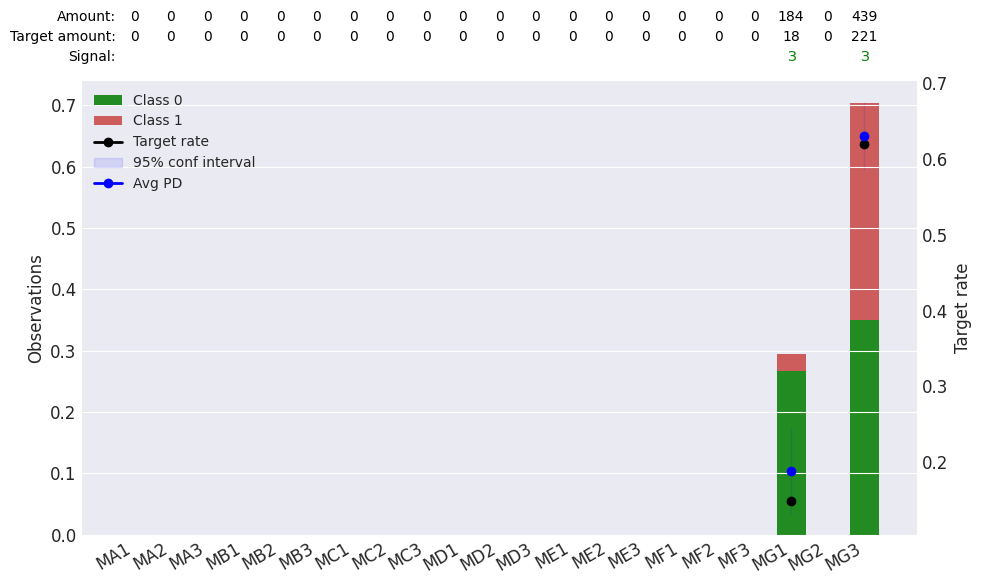

[0.40544, 0.99472]

In [17]:
"""
Калибровка скора модели линейной функцией score_calibr = a + b*score. Результат сохраняется в self.calibration в виде списка [a, b]
:param CT: значение центральной тенденции, к которому приводится среднее PD модели
:param ds: ДатаСэмпл
:param method: метод калибровки. Доступны два варианта:
                0 - Строится логрег скора на таргет, коэффициент b приравнивается полученному коэффициенту при скоре,
                    коэффицент a затем подбирается солвером для попадания в ЦТ при фиксированном b
                1 - Расчитываются веса наблюдений и строится логрег скора на таргет с весами, a и b приравниваются коэффициентам логрега
                2 - Коэффициенты рассчитываются минимизацией заданной функции через вызов scipy.optimize.minimize(fun=fun, x0=x0, args=args, method='nelder-mead')
                любое другое значение - перерасчет коэффициентов не происходит, проводится тест на коэффициентах из self.calibration
:param sample_name: название сэмпла, на котором проводится калибровка
:param scale: шкала, на которой будет проведен биноминальный тест. Задается в виде словаря {грейд: верхняя граница PD грейда}. По умолчанию берется мастер-шкала
:param score_field: поле со скором. Если оно отсутвует в ДатаСэмпле, то будет вызван метод self.scoring
:param result_file: название эксель файла, в который будут записаны результаты
:param plot_flag: флаг для вывода графика
--- Метод калибровки 2 ---
:param fun: пользовательская функция
:param x0: начальные значения параметров
:param args: кортеж аргументов
:param lambda_ab: функция для формирования списка [a, b] из результирующих параметров солвера. При None берется lambda x: x
Примеры использования для калибровки с ограничением минимального PD модели значением minPD:

Вариант 1) Минимизация функции двух переменных
def CT_minPD_delta(params, score, CT, minPD):
    a, b = params
    pd = 1 / (1 + np.exp(-(a + score * b)))
    return (CT - pd.mean()) ** 2 + 10 * (minPD - pd.min())**2

fun=CT_minPD_delta, x0=[0, 1], args=(ds.samples[ds.train_name]['score'], CT, minPD), lambda_ab=None

Вариант 2) Минимизация функции одной переменной, вычисление коэффициента b через связь minPD и лучшего скора по выборке
def CT_delta(params, score, CT, minPD, best_score):
    a = params
    b = (-log(1 / minPD - 1) - a) / best_score
    pd = 1 / (1 + np.exp(-(a + score * b)))
    return (CT - pd.mean()) ** 2

best_score = ds.samples[ds.train_name]['score'].min()
fun=CT_delta, x0=0, args=(ds.samples[ds.train_name]['score'], CT, minPD, best_score), lambda_ab=lambda x: (x[0], (-log(1 / minPD - 1) - x[0]) / best_score))


:return: коэффициенты калибровки [a, b]
"""
CT = 0.5
logreg.calibrate(CT, ds=None, method=0, sample_name=None, scale=None, score_field=None, result_file='calibration.xlsx', plot_flag=True, fun=None, x0=None, args=None, lambda_ab=None)

In [18]:
"""
Тест на калибровку
:param df: ДатаФрейм
:param target: поле с таргетом
:param pd_field: поле с рассчитанным PD
:param w: вес дефолтных наблюдений для теста

:return: ДатаФрейм с результатом теста
"""
df = ds.samples[ds.train_name]
target = ds.target
pd_field = 'score'
df = logreg.scoring(df)
logreg.calibration_test(df, target, pd_field, w=1)        

,upper PD,Avg PD,Target rate,Amount,Target amount,Amount weighted,Target amount weighted,1%,5%,95%,99%,Signal
grade,,,,,,,,,,,,
MA1,5.000e-04,-1.412,0.158,349,55,349,55,-1.666,-1.605,-1.218,-1.157,К
MA2,6.950e-04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MA3,9.760e-04,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB1,1.372e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB2,1.927e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MB3,2.708e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC1,3.804e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC2,5.344e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,
MC3,7.508e-03,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,


In [19]:
"""
Тест Вальда. Вычисление стандартной ошибки, Wald Chi-Square и p-value для всех коэффициентов модели на заданном ДатаСэмпле
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла. При None берется ds.train_sample
:param clf: модель (объект класса LogisticRegression)
:param features: список переменных
:param fit: флаг для обучения модели заново на текущих данных

:return: дафрейм с полями 'feature', 'coefficient', 'se', 'wald', 'p-value'
"""         
logreg.wald_test(ds=None, sample_name=None, clf=None, features=None, fit=False)        

,coefficient,se,wald,p-value
feature,,,,
intercept,-0.206,0.097,4.478,3.433e-02
Sex_WOE,-0.803,0.082,95.913,1.201e-22
Fare_WOE,-0.969,0.127,58.206,2.361e-14


In [20]:
"""
Отбор факторов на основе регуляризации - строится модель на всех переменных, затем итерационно исключаются
переменные с нулевыми или положительными коэффициентами и низкой значимостью
:param ds: ДатаСэмпл. При None берется self.ds
:param features: исходный список переменных. При None берется self.features
:param hold: список переменных, которые обязательно должны остаться после отбора
:param scoring: расчитываемый скор модели
:param pvalue_threshold: граница значимости по p-value
:param verbose: флаг для вывода подробных комментариев в процессе работы

:return: кортеж (итоговый список переменных, график со скором в процессе отбора в виде объекта plt.figure)
"""    
logreg.regularized_selection(ds=None, features=None, hold=None, scoring='gini', pvalue_threshold=0.05, verbose=False)        

(['Sex_WOE', 'Fare_WOE'], None)

(['Sex_WOE', 'Fare_WOE'], <Figure size 500x300 with 1 Axes>)

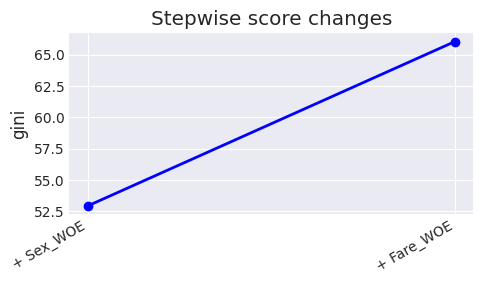

In [21]:
"""
selection_type='forward' - все доступные факторы помещаются в список кандидатов, на каждом шаге из списка кандидатов определяется лучший* фактор и добавляется в модель
    selection_type='backward' - в модель включаются все доступные факторы, затем на каждом шаге исключается худший* фактор
    selection_type='stepwise' - комбинация 'forward' и 'backward'. Каждый шаг состоит из двух этапов:
            на первом из списка кандидатов отбирается лучший* фактор в модель,
            на втором из уже включенных факторов выбирается худший* и исключается

    *Определение лучшего фактора:
    При pvalue_priority=False лучшим фактором считается тот, который увеличивает метрику scoring модели на наибольшую величину.
        Если величина такого увеличения ниже score_delta, то счетчик n_stops уменьшается на 1. Когда он достигнет нуля, отбор прекращается
    При pvalue_priority=True лучшим фактором считается фактор, который после добавления в модель имеет наименьшее p-value.
        Если величина этого p-value выше pvalue_threshold, то счетчик n_stops уменьшается на 1. Когда он достигнет нуля, отбор прекращается

    *Определение худшего фактора:
    Худшим фактором в модели считается фактор с наибольшим p-value.
        Если величина этого p-value ниже pvalue_threshold, то худший фактора не определяется, и исключения не происходит

:param ds: ДатаСэмпл. При None берется self.ds
:param verbose: флаг для вывода подробных комментариев в процессе работы
:param selection_type: тип отбора. Варианты 'forward', 'backward', 'stepwise'
:param features: исходный список переменных. При None берется self.features
:param hold: список переменных, которые обязательно должны остаться после отбора
:param features_ini: список переменных, с которых стартует отбор. Они могут быть исключены в процессе отбора
:param limit_to_add: максимальное кол-во переменных, которые могут быть добавлены к модели
:param score_delta: минимальный прирост метрики
:param scoring: максимизируемая метрика.
        Варианты значений: 'gini', 'AIC', 'BIC', 'SIC', 'SBIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score
:param pvalue_threshold: граница значимости по p-value
:param pvalue_priority: вариант определения лучшего фактора
:param corr_df: матрциа корреляций с элементами False/True. Если задана, то после каждого шага из списка кандидатов исключаются факторы,
                которые имеют значения True как минимум с одним из уже отобранных факторов
:param n_stops: количество срабатываний нарушений правил отбора по приросту метрики/p-value до завершения процедуры отбора

:return: кортеж (итоговый список переменных, график со скором в процессе отбора в виде объекта plt.figure)
"""
logreg.stepwise_selection(ds=None, verbose=False, selection_type='stepwise', features=None, hold=None,
                          features_ini=None, limit_to_add=100, score_delta=0.01, scoring='gini', cv=None,
                          pvalue_threshold=0.05, pvalue_priority=False, corr_df=None, n_stops=1)       

In [22]:
"""
Обучение модели
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла на котором проводится обучение. При None берется ds.train_sample
:param features: список переменных. При None берется self.features
"""
logreg.fit(ds=None, sample_name=None, features=None)        

[INFO] [2023-06-20 14:09:23] intercept = -0.206
[INFO] [2023-06-20 14:09:23] coefs = {'Sex_WOE': -0.803, 'Fare_WOE': -0.969}


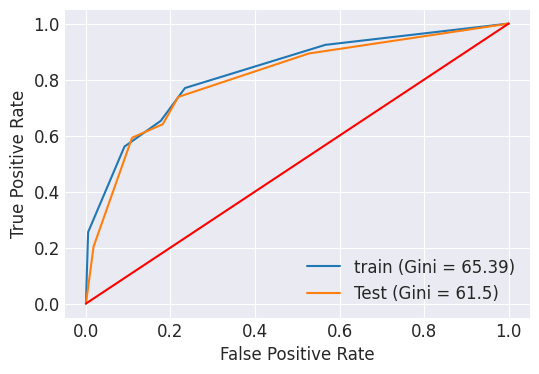

In [23]:
"""
Рассчет джини модели на всех сэмплах и построение ROC-кривой
:param ds: ДатаСэмпл
:param verbose: флаг для вывода ROC-кривой в аутпут

:return: ROC-кривая в виде plt.figure
"""
logreg.roc_curve(ds=None, score_field=None, verbose=False)

In [24]:
"""
Вычисление скора модели на заданной выборке
:param ds: ДатаСэмпл. При None берется self.ds
:param sample_name: название сэмпла. При None берется ds.train_sample
:param clf: классификатор модели. При None берется self.clf
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score
:param scoring: рассчитываемый скор. Варианты значений: 'gini', 'AIC', 'BIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score
:param features: список переменных. При None берется self.features
:param fit: флаг для обучения модели заново на текущих данных

:return: рассчитанный скор
"""
logreg.get_score(ds=None, sample_name=None, clf=None, cv=5, scoring='gini', features=None, fit=True)        

66.12

In [25]:
"""
Скоринг выборки.
:param data: ДатаСэмпл или ДатаФрейм. Возвращается объект того же типа
:param score_field: поле, в которое должен быть записан посчитанный скор
:param pd_field: поле, в которое должен быть записан посчитанный PD
:param scale_field: поле, в которое должен быть записан посчитанный грейд

:return: ДатаСэмпл или ДатаФрейм с добавленными полями скоров, PD и грейда
"""
logreg.scoring(data=ds, score_field='score', pd_field='pd', scale_field=None)        

In [26]:
"""
Генерация хардкода функции scoring
:param file_name: название питоновского файла, куда должен быть сохранен код
:param score_field: поле, в которое должен быть записан посчитанный скор
:param pd_field:  поле, в которое должен быть записан посчитанный PD
:param scale_field:  поле, в которое должен быть записан посчитанный грейд
"""
logreg.to_py(file_name='model.py', score_field='score', pd_field='pd', scale_field=None)        

[INFO] [2023-06-20 14:09:23] The model code for implementation saved to file titanic_output/model.py
import pandas as pd
import numpy as np


def scoring(df, score_field='score', pd_field='pd', scale_field=None):
    """
    Функция скоринга выборки
    Arguments:
        df: [pd.DataFrame] входной ДатаФрейм, должен содержать все нетрансформированные переменные модели
        score_field: [str] поле, в которое должен быть записан посчитанный скор
        pd_field: [str] поле, в которое должен быть записан посчитанный PD
        scale_field: [str] поле, в которое должен быть записан посчитанный грейд
    Returns:
        df: [pd.DataFrame] выходной ДатаФрейм с добавленными полями трансформированных переменных, скоров, PD и грейда
    """

    df['Sex_WOE'] = np.where(df['Sex'].isin(['male']), 0.967, 
                             np.where(df['Sex'].isin(['female']), -1.513, 
                                      -1.513))
    df['Fare_WOE'] = np.where((df['Fare'] < 10.481), 0.925, 
      

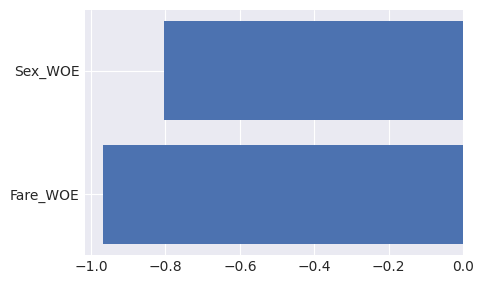

In [27]:
"""
Отрисовка гистограммы коэффициентов модели
:param filename: название файла для сохранения
"""
logreg.draw_coefs(filename=None)        

In [28]:
"""
Валидационные тесты модели на заданном ДатаСэмпле библиотекой bankmetrics
:param ds: ДатаСэмпл
:param result_file: результирующий эксель файл
:param score_field: поле со расчитанным скор (при отсутcnвии этого поля в выборке будет вызван метод self.scoring)
:param pd_field: поле с расчитанным PD
:param scale_field: поле с расчитанным грейдом
"""
logreg.validate(ds=None, result_file='validation.xlsx', score_field='score', pd_field='pd', scale_field=None)

[INFO] [2023-06-20 14:09:23] --------------------------------------------------------------------- Validation ---------------------------------------------------------------------
IV...
Тест Колмогорова-Смирнова...
Джини...
Калибровка...
Корреляция...
VIF...
WOE...
Gini_model...
[INFO] [2023-06-20 14:09:25] Results of validation tests was saved to file titanic_output/validation.xlsx


In [29]:
"""
Вычисление вероятности целевого события
:param ds: ДатаСэмпл
:param sample_name: название сэмпла для вычисление. При None берется ds.train_sample

:return: np.array вероятностей
"""
logreg.predict_proba(ds=None, sample_name=None)        

array([0.13252378, 0.13252378, 0.2910178 , 0.7504463 , 0.13252378,
       0.2910178 , 0.13252378, 0.2910178 , 0.7504463 , 0.57573763,
       0.2910178 , 0.13252378, 0.57573763, 0.2910178 , 0.7504463 ,
       0.90860669, 0.7504463 , 0.7504463 , 0.2910178 , 0.2910178 ,
       0.13252378, 0.13252378, 0.7504463 , 0.7504463 , 0.52812378,
       0.13252378, 0.7504463 , 0.13252378, 0.7504463 , 0.13252378,
       0.13252378, 0.13252378, 0.7504463 , 0.13252378, 0.57573763,
       0.2910178 , 0.52812378, 0.57573763, 0.7504463 , 0.2910178 ,
       0.13252378, 0.90860669, 0.52812378, 0.57573763, 0.57573763,
       0.57573763, 0.90860669, 0.2910178 , 0.7504463 , 0.2910178 ,
       0.90860669, 0.7504463 , 0.57573763, 0.2910178 , 0.13252378,
       0.13252378, 0.7504463 , 0.13252378, 0.13252378, 0.13252378,
       0.90860669, 0.13252378, 0.2910178 , 0.7504463 , 0.13252378,
       0.2910178 , 0.2910178 , 0.13252378, 0.90860669, 0.13252378,
       0.90860669, 0.13252378, 0.7504463 , 0.13252378, 0.29101

In [30]:
"""
Выполняет расчет метрик кандидатов для добавления в модель
:param features: список переменных в модели. При None берется self.features
:param candidates: список кандидатов на добавление. При None берется self.ds.features
:param scoring: максимизируемая метрика.
        Варианты значений: 'gini', 'AIC', 'BIC', 'SIC', 'SBIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score
:param corr_df: матрциа корреляций с элементами False/True. Если задана, то из списка кандидатов исключаются факторы,
                которые имеют значения True как минимум с одним из списка features

:return: ДатаФрейм с полями 'feature', 'score', 'p-value', в котором для каждого кандидата приводятся
         метрика scoring модели и p-value кандидата, после построения модели с переменными features + [feature]
"""
logreg.add_feature(features=None, candidates=None, scoring='gini', cv=None, corr_df=None)        

,feature,score,p-value


In [31]:
"""
Выполняет расчет метрик кандидатов для удаления из модели в модель
:param features: список переменных в модели. При None берется self.features
:param scoring: максимизируемая метрика.
        Варианты значений: 'gini', 'AIC', 'BIC', 'SIC', 'SBIC' + все метрики доступные для вычисления через sklearn.model_selection.cross_val_score.
        Все информационные метрики после вычисления умножаются на -1 для сохранения логики максимизации метрики.
:param cv: параметр cv для вычисления скора sklearn.model_selection.cross_val_score

:return: ДатаФрейм с полями 'feature', 'score', 'p-value', в котором для каждого кандидата приводятся
         метрика scoring модели с переменными set(features) - {feature} и p-value кандидата
"""
logreg.drop_feature(features=None, scoring='gini', cv=None)        

,feature,score,p-value
0,Fare_WOE,52.935,2.370e-14
1,Sex_WOE,40.205,1.248e-22
